Machine Learning Uniquindio UTP 2024-1

Jonnatan Arias Garcia

jariasg@uniquindio.edu.co jonnatan.arias@utp.edu.co

# Clustering Jerárquico

Los métodos de clusterización corresponden a una rama de ML de aprendizaje no supervisado donde la idea principal es encontrar grupos en los datos que sean similares a otros datos del mismo grupo y lo menos similar posible a datos en otros.


El método jerárquico **Hierarchical Clustering**, con la idea de segmentar clientes en distintos grupos basándonos en sus tendencias de compra.


El dataset que utilizaremos en este caso es el "shopping_data.csv" que está subido a la carpeta de la materia.

In [15]:
# importamos las librerías usuales de python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importamos los algoritmos de clusterizacion a utilizar en esta notebook
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico

Para agilizar el proceso de clusterización en el dataset de caras vamos identificar las componentes principales como en la clase pasada.

In [16]:
# Clase para realizar componentes principales
from sklearn.decomposition import PCA

# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() # Creamos el estandarizador

## [Clustering Jerárquico](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

Los métodos de clustering jerárquico buscan agrupar las samples más similares para formar grupos con características similares.

1. **Agglomerative**: cada sample es un cluster y en cada paso va agrupando los clusters más similares hasta quedarse con un solo cluster
2. **Divisive**: todas las samples comienzan en el mismo cluster y en cada paso va cortando las samples menos similares hasta que todas las samples sean un cluster distinto

En esta notebook vamos a ver el primer tipo de clustering jerárquico aplicado a un dataset de tendencias de compra de clientes de un shopping

In [17]:

url = 'https://raw.githubusercontent.com/myarist/DQLab/e6fbd8e6bbcffd4f1eb094a1e762a1fb07852625/Learn/Python/Fundamental/Data%20Wrangling%20Python/shopping_data.csv'

# Carga el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(url)
# Carga del dataset
# df = pd.read_csv(filename)

# Inspecciono las primeras filas
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
print("Dimensiones del dataset:",df.shape)

Dimensiones del dataset: (200, 5)


Este dataset tiene de features una ID asociada a cada uno de los 200 clientes, el género binario(male o female), la edad de la persona, el ingreso anual (en miles de dolares) y un puntaje asociado a cuán a menudo un cliente gasta plata en el shopping siendo 100 el cliente que más gasta.

Vamos a tratar de agrupar a los clientes utilizando solo dos features del dataset: su ganancia anual y el puntaje de gastos

In [19]:
# Me armo una matriz con las ultimas dos columnas del dataframe
sdata = df.iloc[:,3:5].values

sdata[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

Importamos un paquete de scipy que nos va a ayudar a plotear dendogramas. Lo importamos entero porque vamos a usar dos de sus clases 'dendogram' y 'linkage'.

In [20]:
# Paquete de scipy que tiene la clase 'dendograma' que vamos a utilizar
import scipy.cluster.hierarchy as shc

Vamos a realizar un dendograma del dataset utilizando el método 'ward' para calcular distancias (es el que se suele ultilizar y viene por default). Este método minimiza la varianza dentro de un cluster y maxima la varianza entre clusters.

$$
d(u, v) =\sqrt{\frac{|T(u)|+|T(v)|}{|T(u)+T(v)|}} \cdot d_{\text {distancia }}(u, v)
$$

Donde:
- $d(u, v)$ representa la distancia entre los clusters $u$ y $v$
- $T(u)$ y $T(v)$ son el tamaño de los clusters $u$ y $v$ respectivamente
- $d_{\text {distancia }}(u, v)$ es la distancia entre los puntos individuales $u$ y $v$

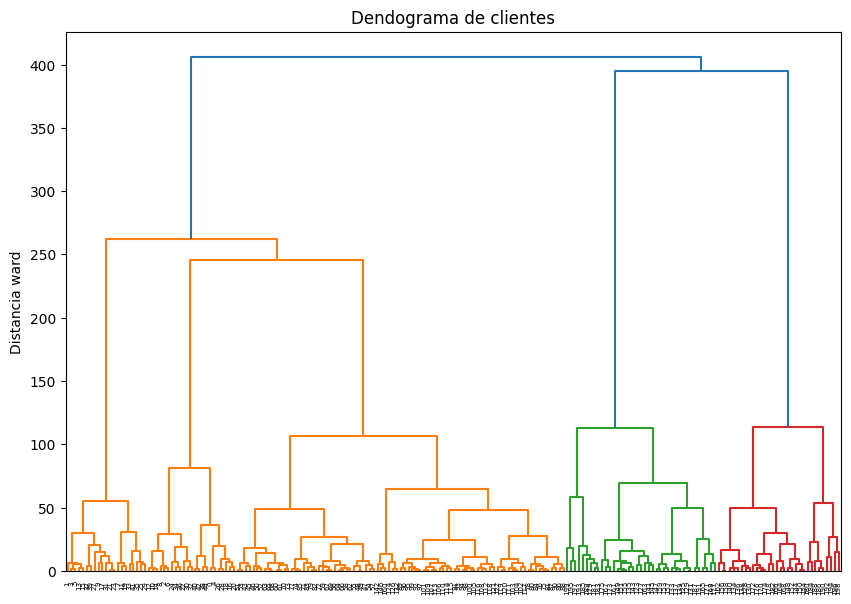

In [21]:
# Plot del dendograma del dataset de clientes
plt.figure(figsize=(10, 7))
plt.title("Dendograma de clientes")
plt.ylabel("Distancia ward")

# Con la función 'dendogram' graficamos el dendograma.
dend = shc.dendrogram(shc.linkage(sdata, method='ward'))  # El input de esta función es la función 'linkage' donde se especifica la distancia para utlizar en cada paso del método

Lo que buscamos en el dendograma es la mayor distancia vertical sin que haya una línea horizontal para hacerle un corte (representado como una linea horizontal que cruza todos los datos) y quedarnos con k clusters (donde k es el número de lineas verticales que intersectan el corte.

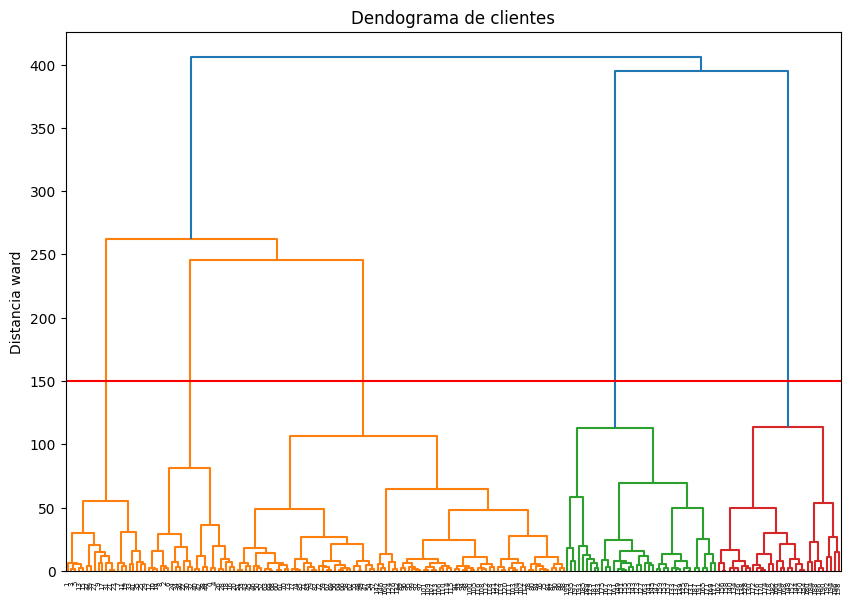

In [22]:
# Plot del dendograma del dataset de clientes
plt.figure(figsize=(10, 7))
plt.title("Dendograma de clientes")
plt.ylabel("Distancia ward")

# Con la función 'dendogram' graficamos el dendograma.
dend = shc.dendrogram(shc.linkage(sdata, method='ward'))  # El input de esta función es la función 'linkage' donde se especifica la distancia para utlizar en cada paso del método
plt.axhline(150, c='r')

Vemos que el corte intersecta con 5 líneas verticales por lo que vamos a utilizar el método de clustering jerárquico de sklearn con n_clusters=5

In [23]:
# Importo el método de clustering jerárquico (bottom-up)
from sklearn.cluster import AgglomerativeClustering

Ahora sí aplicamos el método de clusterización jerárquica (bottom-up) con 5 clusters, la distancia euclidea para la afinidad y la distancia ward para el linkage

In [24]:
# Creamos el modelo
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Lo ajustamos con los datos
cluster.fit_predict(sdata)  # fit_predict hace lo mismo que fit pero devuelve el vector de etiquetas de las samples

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Veamos cómo se ven los datos agrupados en el espacio de features

Text(0, 0.5, 'Puntaje de gastos')

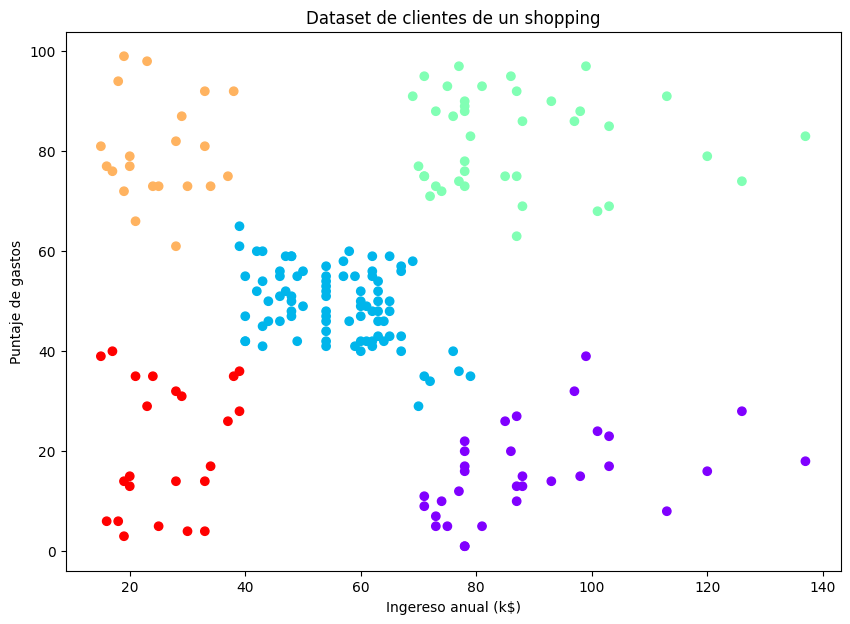

In [25]:
# Ploteamos los datos en el espacio de (Ingresos,Gastos) con un color por cada uno de los 5 clusters
plt.figure(figsize=(10, 7))
plt.title("Dataset de clientes de un shopping")
plt.scatter(sdata[:,0], sdata[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Ingereso anual (k$)")
plt.ylabel("Puntaje de gastos")

El cluster violeta, abajo a la derecha, corresponde a clientes con salarios altos pero que gastan poco en el shopping. Estos son clientes que gastan con cuidado su dinero.

El cluster verde clarito representa a clientes con mucho salario y que gastan hasta el último centavo en bobadas. Estos son los tipos de clientes que una compañía busca para llenarlos de publicidad.

El cluster celeste es el de clientes 'promedio'. El mayor numero de samples cae dentro de este cluster y por eso también son el objetivo de compañías que buscan llegar a mucha gente.